#### Overview of Autoregressive Models
Autoregressive AR models are a class of statistical models used for time series analysis and forecasting. They predict future values by regressing the variable on its own lagged (past) values.

##### Key Concepts

- **Lagged Dependence:** The current observation is modeled as a function of its previous values. For example, in an AR(1) model, the current value depends only on the immediately previous value.

- **Order of the Model:** The "order" indicates how many past observations are used for prediction. An AR(N) model uses the last N values. 

- **Stationarity:** For many AR models, it is assumed that the time series is stationary, meaning its statistical properties (mean, variance) do not change over time.

- **Model Estimation:** Parameters of an AR model are typically estimated using methods such as maximum likelihood estimation or least squares.

##### Extensions and Applications

- **Nonlinear Autoregressive Models:** When the linear assumption is too restrictive, nonlinear models, including those implemented using neural networks, can capture more complex dynamics.

- **Neural Network Approaches:** For instance, multilayer perceptrons (MLP) can be employed in an autoregressive setting to model nonlinear relationships within a sequence.

- **Practical Use Cases:** AR models are widely used in economics, finance, weather forecasting, and any domain where understanding temporal relationships is critical.

Autoregressive models provide a foundation for many advanced time series forecasting methods by leveraging the inherent temporal structure of data.

### A Brief Historical Overview

#### From Language Models to Image Generation

Language Models (LMs) originally modeled the probability of a sequence of tokens as a product of conditionals:
$$
P(x) = \prod_{i=1}^{n} P(x_i \mid x_1, x_2, \dots, x_{i-1})
$$
This formulation inspired researchers to extend similar autoregressive approaches to images.

#### PixelRNN

PixelRNN adapts the LM idea for image modeling by sequentially predicting each pixel. The image is generated pixel by pixel, where each pixel's probability is conditioned on previously generated pixels.

Here, RNN is used to capture spatial dependencies in images. Although powerful, the sequential nature made training and inference computationally heavy.

#### PixelCNN

PixelCNN was introduced to overcome the limitations of PixelRNN. Instead of RNNs, it uses convolutional neural networks with carefully designed masking to ensure the autoregressive property. Each pixel is generated based on a fixed receptive field of previously generated pixels. The masked convolutions enforce that we have a causal model while allowing for highly parallelized computation during training.

#### PixelCNN++

PixelCNN++ further refines the model by:
- Improving the loss function to better model the distribution of pixel intensities.
- Utilizing more expressive conditioning via mixtures of logistics.
- Enhancing efficiency and sample quality.

The improvements in PixelCNN++ lead to sharper images and more stable training, building upon the masking strategies of PixelCNN. The model represents a matured version of autoregressive image generation, combining the benefits of convolutional architectures with advanced probabilistic modeling.
```

### Time Series Forcasting Using MLPs

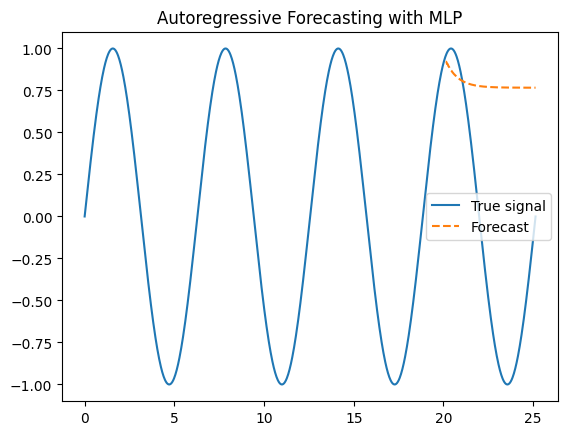

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Generate sine wave
T = 1000
t = np.linspace(0, 8 * np.pi, T)
x = np.sin(t)

# Prepare dataset: predict next value from previous N
N = 10  
X = np.array([x[i:i+N] for i in range(T - N)])
Y = np.array([x[i+N] for i in range(T - N)])
X_train, Y_train = torch.tensor(X, dtype=torch.float32), torch.tensor(Y, dtype=torch.float32).unsqueeze(1)

# Define simple MLP
model = nn.Sequential(
    nn.Linear(N, 64),
    nn.ReLU(),
    nn.Linear(64, 1)
)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device) #move model to device
X_train, Y_train = X_train.to(device), Y_train.to(device) #move data to device
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Train
for epoch in range(200):
    pred = model(X_train)
    loss = loss_fn(pred, Y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Forecast next 200 values autoregressively starting from 200 last values
context = X_train[-200].detach().clone()
forecast = []
for _ in range(200):
    next_val = model(context.unsqueeze(0)).item()
    forecast.append(next_val)
    context = torch.cat([context[1:], torch.tensor([next_val])])

# Plot
plt.plot(t, x, label="True signal")
forecast_start = t[-200:]
plt.plot(forecast_start, forecast, label="Forecast", linestyle='dashed')
plt.legend()
plt.title("Autoregressive Forecasting with MLP")
plt.show()

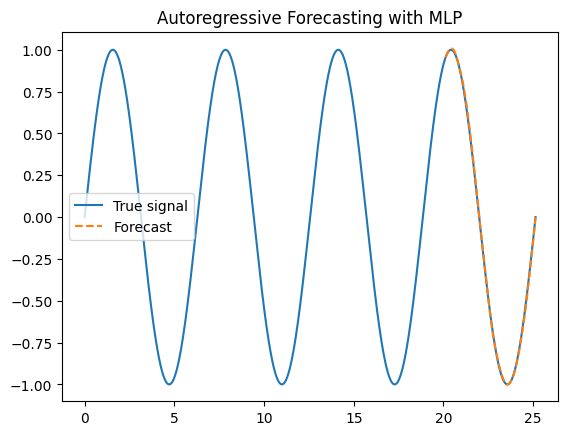

In [2]:
# Increase N to 50 for more complex forecasting

# Generate sine wave
T = 1000
t = np.linspace(0, 8 * np.pi, T)
x = np.sin(t)

# Prepare dataset: predict next value from previous N
N = 50  
X = np.array([x[i:i+N] for i in range(T - N)])
Y = np.array([x[i+N] for i in range(T - N)])
X_train, Y_train = torch.tensor(X, dtype=torch.float32), torch.tensor(Y, dtype=torch.float32).unsqueeze(1)

# Define simple MLP
model = nn.Sequential(
    nn.Linear(N, 64),
    nn.ReLU(),
    nn.Linear(64, 1)
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)  # move model to device
X_train, Y_train = X_train.to(device), Y_train.to(device)  # move data to device
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Train
for epoch in range(200):
    pred = model(X_train)
    loss = loss_fn(pred, Y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Forecast next 200 values autoregressively starting from 200 last values
context = X_train[-200].detach().clone()
forecast = []
for _ in range(200):
    next_val = model(context.unsqueeze(0)).item()
    forecast.append(next_val)
    context = torch.cat([context[1:], torch.tensor([next_val])])

# Plot
plt.plot(t, x, label="True signal")
forecast_start = t[-200:]
plt.plot(forecast_start, forecast, label="Forecast", linestyle='dashed')
plt.legend()
plt.title("Autoregressive Forecasting with MLP")
plt.show()

### Basic Masked CNN for Pixel-by-Pixel Image Generation

In [3]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: (x > 0.5).float()) 
])

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
loader = DataLoader(mnist, batch_size=64, shuffle=True)

<figure align="center">
    <img src="kernel.png" alt="Centered Plot" width="250"/>
    <figcaption>Masked Kernel</figcaption>
</figure>

<!-- <p align="center">
    <img src="kernel.png" alt="Centered Plot" width="250"/>
</p> -->

In [4]:
import torch.nn as nn

class MaskedConv2d(nn.Conv2d):
    def __init__(self, mask_type, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.register_buffer("mask", self.weight.data.clone())
        _, _, h, w = self.weight.size()
        self.mask.fill_(1)
        yc, xc = h // 2, w // 2
        self.mask[:, :, yc + 1:, :] = 0
        self.mask[:, :, yc, xc + (mask_type == 'B'):] = 0

    def forward(self, x):
        self.weight.data *= self.mask
        return super().forward(x)

class TinyPixelCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            MaskedConv2d('A', 1, 32, 7, padding=3), 
            nn.ReLU(),
            MaskedConv2d('B', 32, 32, 7, padding=3),
            nn.ReLU(),
            MaskedConv2d('B', 32, 1, 1)  
        )

    def forward(self, x):
        return self.net(x)

In [7]:
model = TinyPixelCNN().to(device)  # move model to device
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.BCEWithLogitsLoss()
ls=0
# loader.to(device)  # Removed: DataLoader cannot be moved to device
#measure initial performance
for x, _ in loader:
    model.eval()
    x = x.to(device)
    out = model(x)
    loss = loss_fn(out, x)
    ls += loss.item()

print(f"Initial loss: ", ls/len(loader))

ls=0
# Training loop
for epoch in range(3):
    model.train()
    for x, _ in loader:
        x = x.to(device)
        out = model(x)
        loss = loss_fn(out, x)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        ls += loss.item()
        ls += loss.item()
    ls /= len(loader)
    print(f"Epoch {epoch}: {ls:.4f}")
    ls = 0

Initial loss:  0.7229317564572861
Epoch 0: 0.2809
Epoch 1: 0.1970
Epoch 2: 0.1929


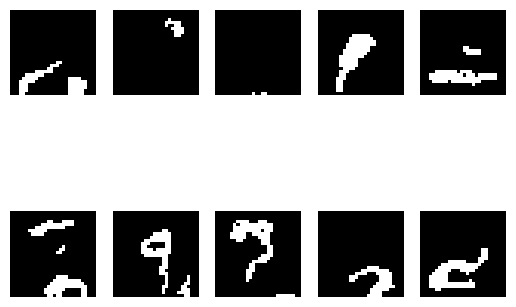

In [8]:
def sample(model, n=10):
    model.eval()
    samples = torch.zeros(n, 1, 28, 28).to(device)
    with torch.no_grad():
        for i in range(28):
            for j in range(28):
                out = model(samples)
                prob = torch.sigmoid(out[:, :, i, j])
                samples[:, :, i, j] = torch.bernoulli(prob)
    return samples

samples = sample(model)
import matplotlib.pyplot as plt
grid = samples.view(-1, 28).cpu().numpy()
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(samples[i, 0], cmap='gray')
    plt.axis('off')
plt.show()


### transformers.AutoModelForCausalLM and Darts


In [10]:
#introduce transformers.AutoModelForCausalLM
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
import tqdm as notebook_tqdm

# Load a pre-trained model and tokenizer
model_name = "gpt2"  # You can change this to any other model available in Hugging Face
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

# Set the model to evaluation mode
model.eval()

# Tokenize input text
input_text = "Deep Generative Models are fascinating because"
inputs = tokenizer(input_text, return_tensors="pt")

# Generate text
with torch.no_grad():
    outputs = model.generate(inputs.input_ids, max_length=50, num_return_sequences=1, pad_token_id=tokenizer.eos_token_id)

# Decode the generated text
generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(generated_text)

Deep Generative Models are fascinating because they allow us to explore the nature of the world and the ways in which we can use them to shape it.

The first step in this process is to understand how the world works. The second step is


<TimeSeries (DataArray) (time: 100, component: 1, sample: 1)> Size: 800B
array([[[ -1.89500108]],

       [[ -2.18799534]],

       [[ -4.20475096]],

       [[ -3.52690857]],

       [[ -5.67335985]],

       [[ -5.35004695]],

       [[ -5.2831639 ]],

       [[ -5.75872602]],

       [[ -5.31246417]],

       [[ -5.66163802]],

...

       [[-19.09141218]],

       [[-18.95404704]],

       [[-17.85339467]],

       [[-17.80975744]],

       [[-17.48305742]],

       [[-17.63421543]],

       [[-16.86868007]],

       [[-16.57006457]],

       [[-16.24680939]],

       [[-17.4566415 ]]])
Coordinates:
  * time       (time) datetime64[ns] 800B 2020-01-01 2020-01-02 ... 2020-04-09
  * component  (component) <U5 20B 'value'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None
    metadata:           None


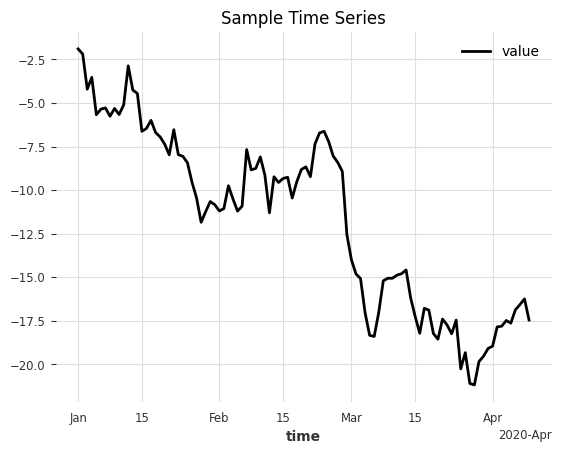

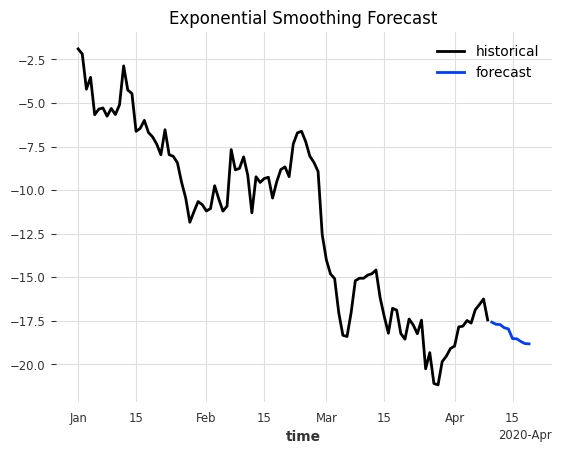

In [11]:
# Darts forecasting example
from darts import TimeSeries
import pandas as pd
from darts.models import ExponentialSmoothing


# Create a simple time series
data = {'time': pd.date_range(start='2020-01-01', periods=100, freq='D'),
    'value': np.random.randn(100).cumsum()  # Cumulative sum to create a trend
}
df = pd.DataFrame(data)
# Convert to Darts TimeSeries
series = TimeSeries.from_dataframe(df, time_col='time', value_cols='value')

# Print the series
print(series)

# Plot the series
series.plot()
plt.title("Sample Time Series")
plt.show()


# Fit a simple Exponential Smoothing model
model = ExponentialSmoothing()
model.fit(series)

# Forecast the next 10 time points
forecast = model.predict(10)

# Plot the forecast
series.plot(label='historical')
forecast.plot(label='forecast', lw=2)
plt.title("Exponential Smoothing Forecast")
plt.legend()
plt.show()